## Homework 10 Question 1
##### 2022-07-27

In [1]:
import warnings
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Part A

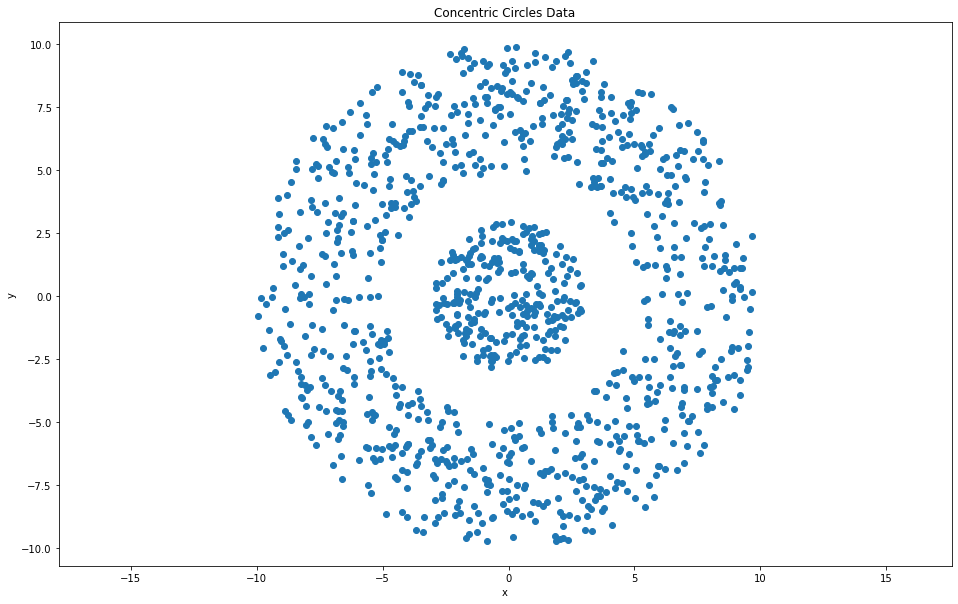

In [2]:
x = pd.read_csv("ConcentricCirclesData.csv", index_col=0)

_, ax = plt.subplots(figsize=(16, 10))
plt.scatter(x.x, x.y)
plt.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Concentric Circles Data')
plt.show()

The scatterplot shows two concentric circles in a target shape. There are two clusters.

### Part B

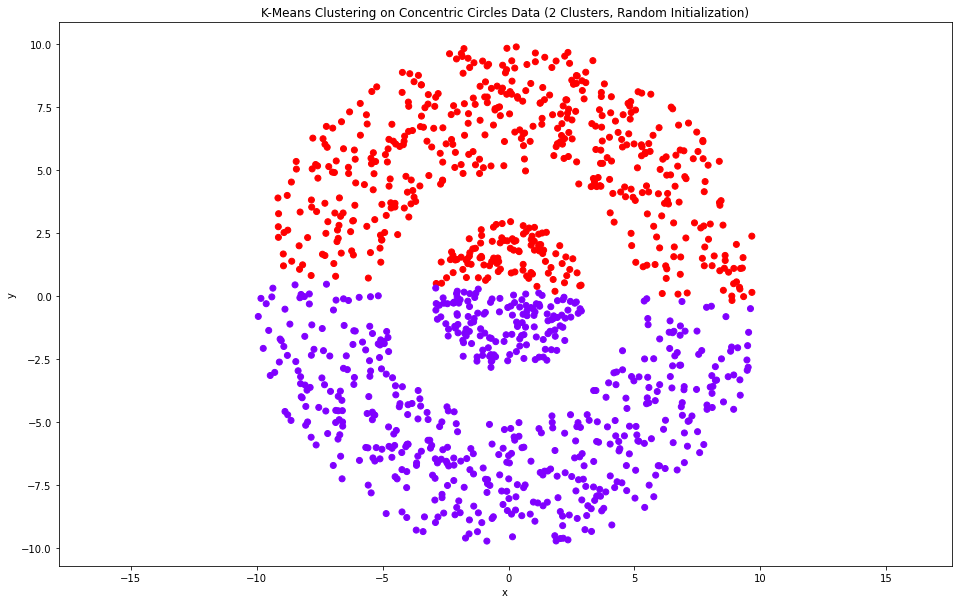

In [3]:
kmeans = KMeans(n_clusters=2, init='random', random_state=0)
kmeans.fit(x)

_, ax = plt.subplots(figsize=(16, 10))
plt.scatter(x.x, x.y, c=kmeans.labels_, cmap='rainbow')
plt.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('K-Means Clustering on Concentric Circles Data (2 Clusters, Random Initialization)')
plt.show()

This method does __not__ identify the clusters in the plot correctly.

### Part C

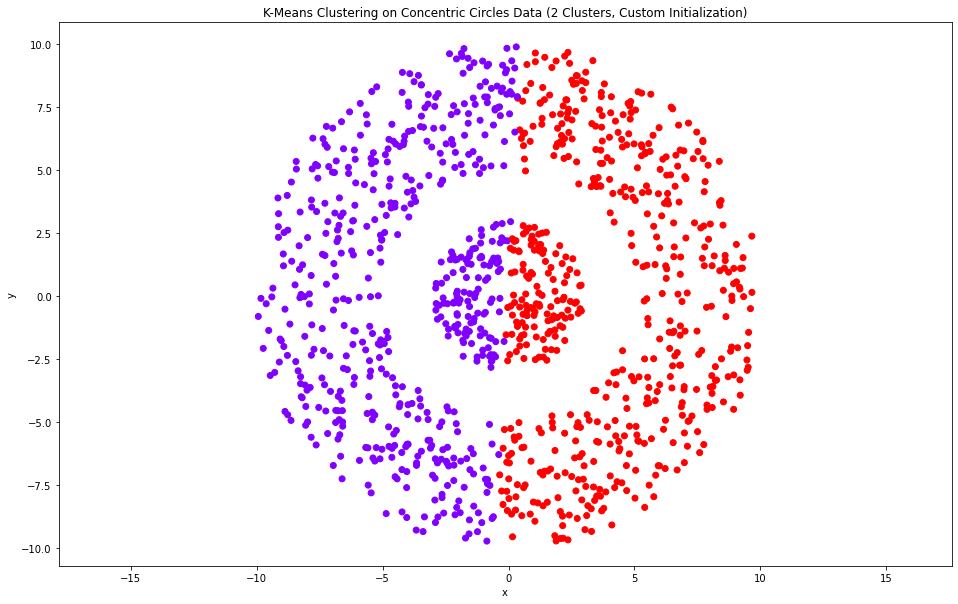

In [4]:
kmeans = KMeans(n_clusters=2, init=[[-8, 0], [1, -1]], random_state=0)
kmeans.fit(x)

_, ax = plt.subplots(figsize=(16, 10))
plt.scatter(x.x, x.y, c=kmeans.labels_, cmap='rainbow')
plt.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('K-Means Clustering on Concentric Circles Data (2 Clusters, Custom Initialization)')
plt.show()

This method does __not__ identify the clusters in the plot correctly. While specifying initial state does produce different results, the results are __not__ any better.

### Part D

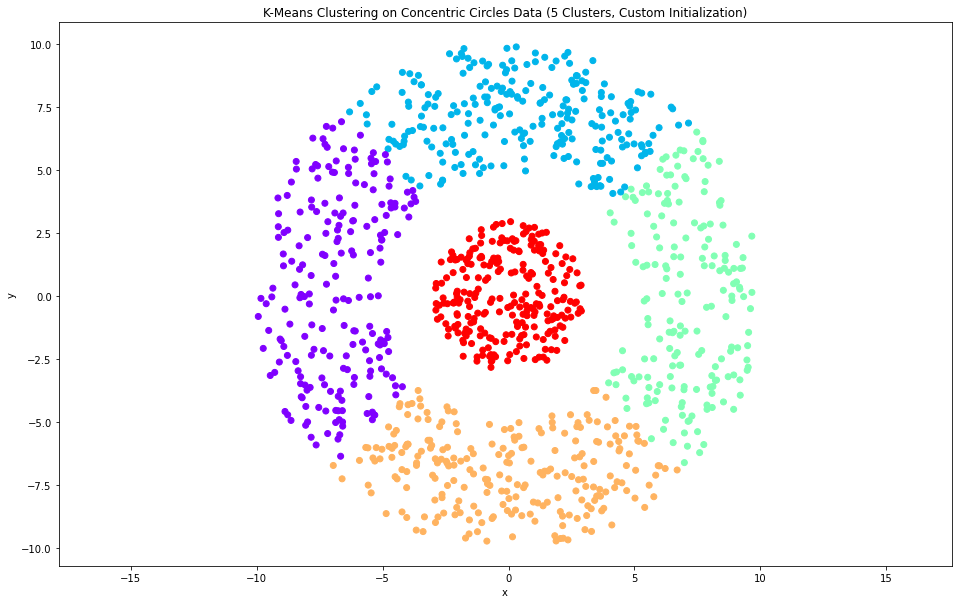

In [5]:
kmeans = KMeans(n_clusters=5, init=[[-7.5, 0], [0, 7.5], [7.5, 0], [0, -7.5], [0, 0]], random_state=0)
kmeans.fit(x)

_, ax = plt.subplots(figsize=(16, 10))
plt.scatter(x.x, x.y, c=kmeans.labels_, cmap='rainbow')
plt.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('K-Means Clustering on Concentric Circles Data (5 Clusters, Custom Initialization)')
plt.show()

Although it is better than previous plots, this method still does __not__ identify the clusters in the plot correctly. It does produce a correct cluster around the inner circle, but it still does not solve the problem of the outer circle. Specifying initial state does aid the algorithm in finding the cluster near the origin but otherwise does __not__ fix the clustering with the outer circle; it is simply divided into four individual clusters.

### Part E

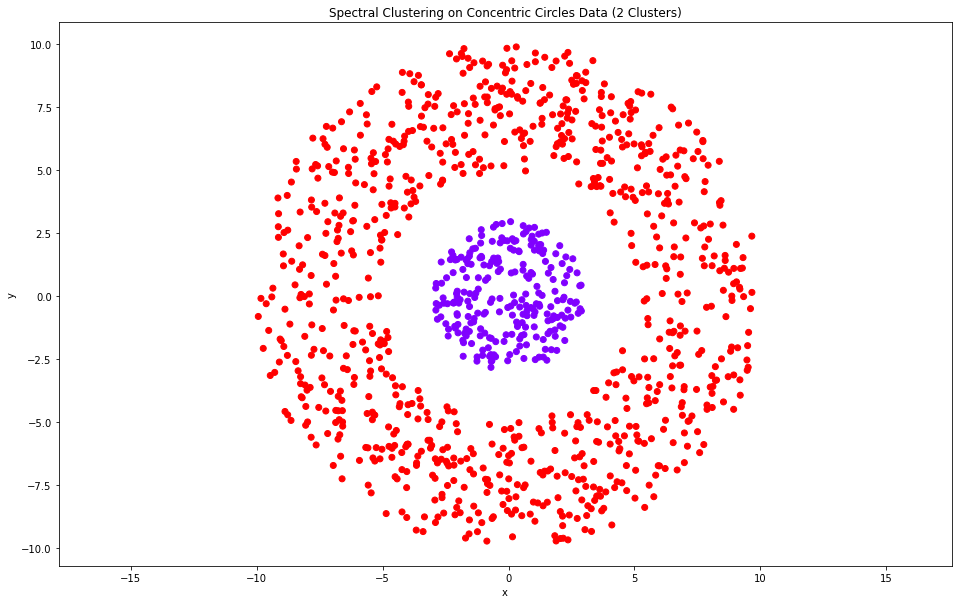

In [6]:
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
spectral.fit(x)

_, ax = plt.subplots(figsize=(16, 10))
plt.scatter(x.x, x.y, c=spectral.labels_, cmap='rainbow')
plt.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Spectral Clustering on Concentric Circles Data (2 Clusters)')
plt.show()

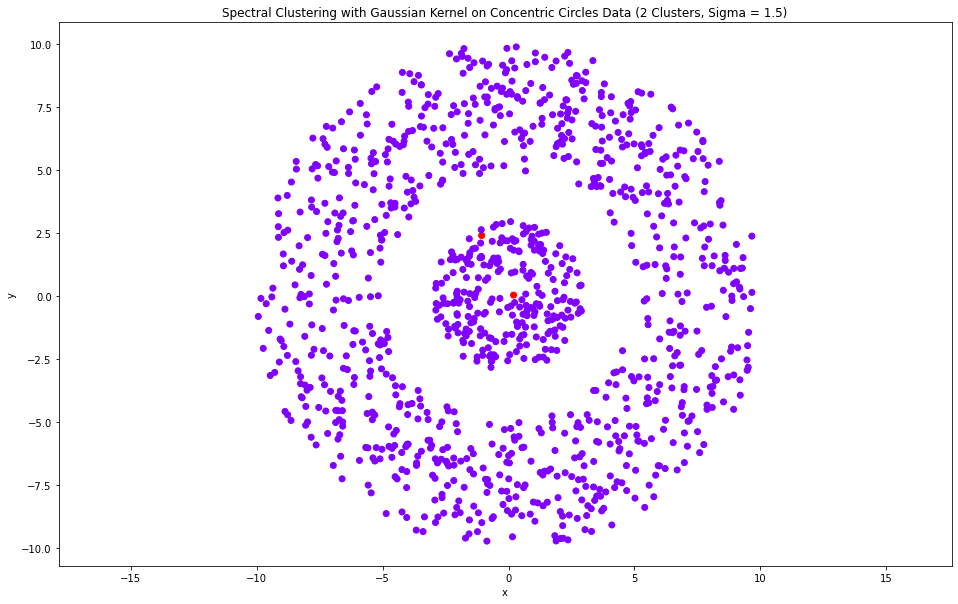

In [12]:
def gaussian_kernel(x, sigma):
    return np.exp(-pairwise_distances(x, x) ** 2 / (2 * sigma ** 2))

def get_top_k_eigenvectors(x, k):
    eigenvalues, eigenvectors = np.linalg.eig(x)
    eigenvectors = eigenvectors[:, np.argsort(eigenvalues)[::-1]]
    return eigenvectors[:, :k]

def gaussian_spectral(x, k, sigma):
    affinity = gaussian_kernel(x, sigma)
    affinity = affinity - np.diag(np.diag(affinity))
    degrees = np.diag(np.sum(affinity, axis = 0) ** -0.5)
    laplacian = degrees.dot(affinity).dot(degrees)
    y = get_top_k_eigenvectors(laplacian, k)
    for i in range(k):
        y[i, :] = y[i, :] / np.linalg.norm(y[i, :])
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(y)
    _, ax = plt.subplots(figsize=(16, 10))
    plt.scatter(x.x, x.y, c=kmeans.labels_, cmap='rainbow')
    plt.axis('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Spectral Clustering with Gaussian Kernel on Concentric Circles Data ({k} Clusters, Sigma = {sigma})')
    plt.show()

gaussian_spectral(x, 2, 1.5)

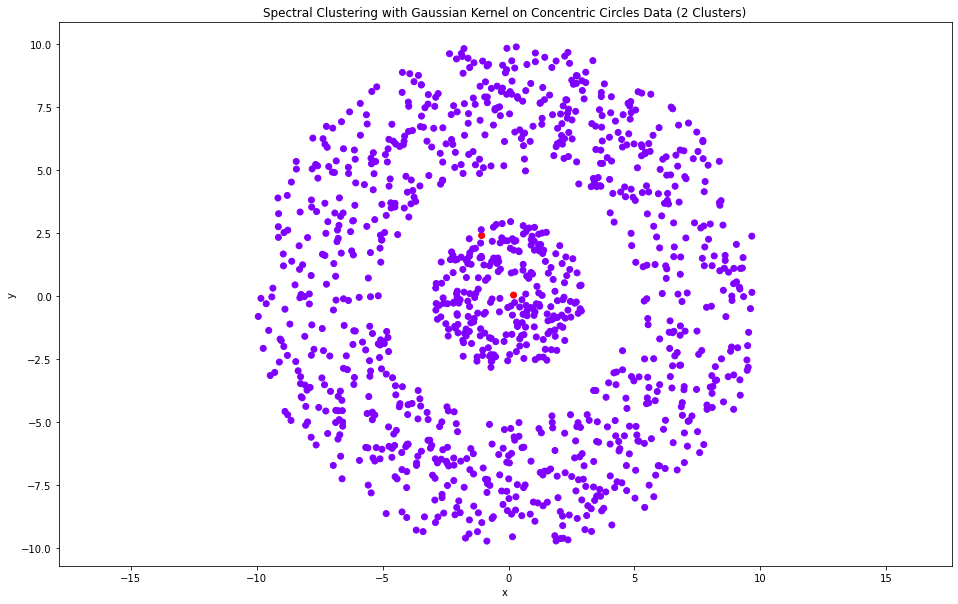

In [8]:
gaussian_spectral(x, 2, 0.5)

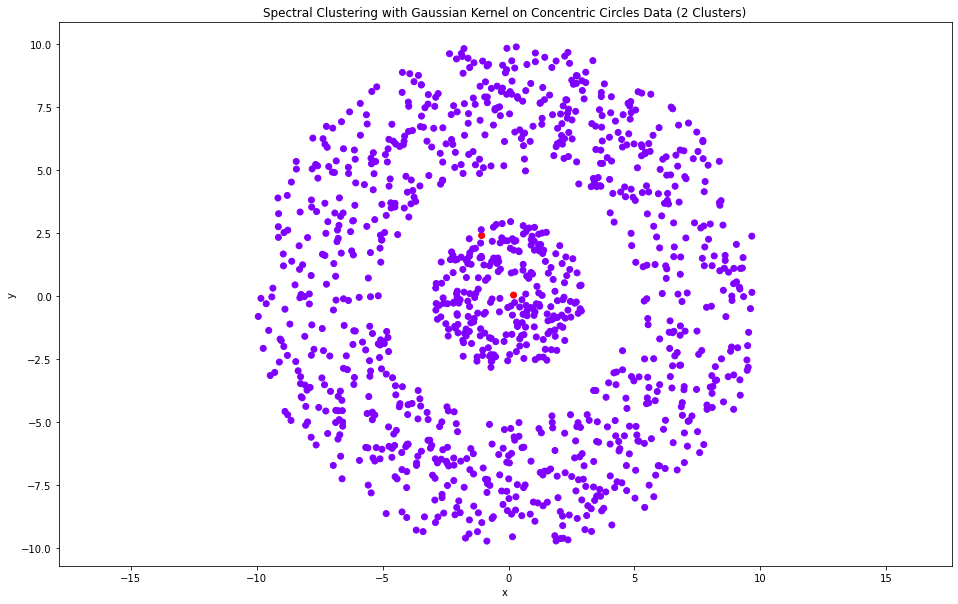

In [9]:
gaussian_spectral(x, 2, 1)

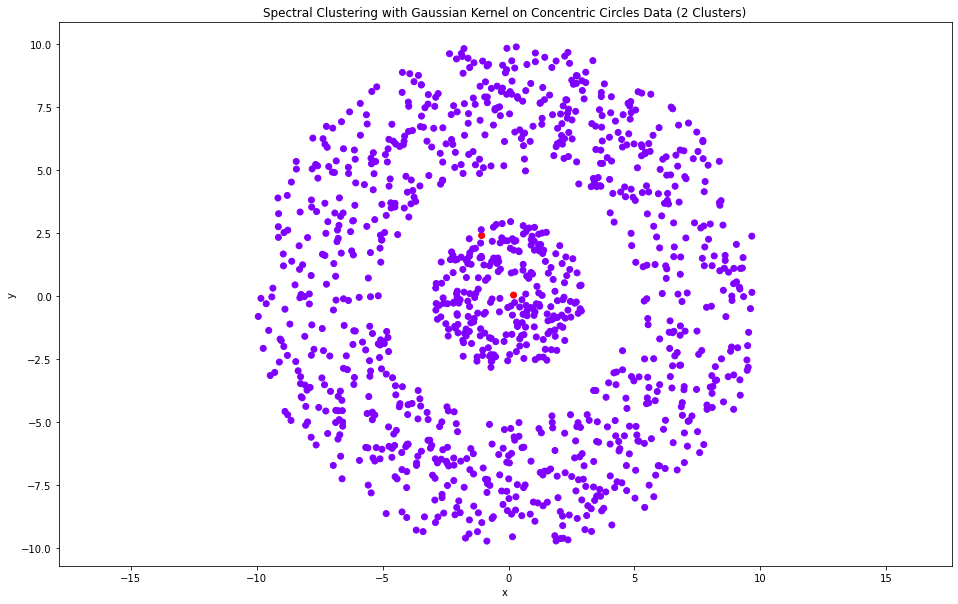

In [10]:
gaussian_spectral(x, 2, 2)